In [1]:
from io import StringIO

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.linear_model

In [2]:
degs = pd.read_csv(
    StringIO(
        """celltype,num_deg,num_cell
B,718,344
CD14+ Mono,1366,481
CD8 T,296,291
DC,672,32
FCGR3A+ Mono,1180,162
Memory CD4 T,473,476
Naive CD4 T,907,684
NK,572,155
Platelet,437,13
"""
    )
)

In [13]:
def corrected_deg(
    deg_df: pd.DataFrame, celltype_color: list[str] | sns.palettes._ColorPalette
) -> plt.Figure:
    # modeling linear regression
    X = deg_df[["num_cell"]].values.reshape(-1, 1)
    y = deg_df["num_deg"].values
    model = sklearn.linear_model.LinearRegression().fit(X, y)

    # calculating residuals for each cell type
    deg_df["residuals"] = y - model.predict(X)

    # ranking cell type
    deg_df = deg_df.sort_values(by="residuals", ascending=False).reset_index(drop=True)
    deg_df["rank"] = deg_df.index + 1

    # plotting rankplot
    fig, ax = plt.subplots()

    ax = sns.scatterplot(
        data=deg_df,
        x="rank",
        y="residuals",
        hue=range(len(deg_df)),
        palette=celltype_color,
        s=100,
        ax=ax,
    )

    for _, row in deg_df.iterrows():
        ax.text(
            row["rank"],
            row["residuals"],
            row["celltype"],
            verticalalignment="bottom",
            horizontalalignment="left",
            fontsize=8,
            color="black",
        )

    # Add horizontal line at y=0
    ax.axhline(y=0, linestyle="--", color="black")
    ax.set_xlabel("Rank")
    ax.set_xlabel("Corrected Number of DEGs")
    ax.grid(False)
    ax.legend(
        ax.get_legend_handles_labels()[0],
        {i: i for i in deg_df["celltype"]},
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        title="celltype",
    )

    return fig

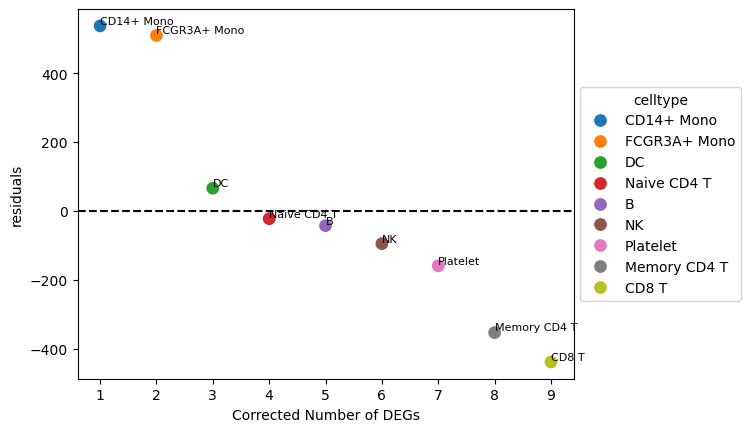

In [14]:
fig = corrected_deg(degs, sns.color_palette("tab10", n_colors=9))